In [4]:
import os
import pandas as pd


In [5]:
model_name = sorted(os.listdir('trained_models/reinforcement_learning'))[-1]
df = pd.read_csv(f'trained_models/reinforcement_learning/{model_name}/progress.txt', sep='\t').set_index('Epoch')

In [6]:
df.sample()

,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,EpLen,AverageVVals,StdVVals,MaxVVals,MinVVals,TotalEnvInteracts,LossPi,LossV,DeltaLossPi,DeltaLossV,Entropy,KL,ClipFrac,StopIter,Time
Epoch,,,,,,,,,,,,,,,,,,,
382,31.777779,56.27221,100.0,-52.0,1075.2222,-2.294938,10.985186,18.137115,-47.218197,3830000,-2.483527e-09,54.996456,-0.00826,-33.36992,0.404174,0.015285,0.060806,9.0,8696.129866


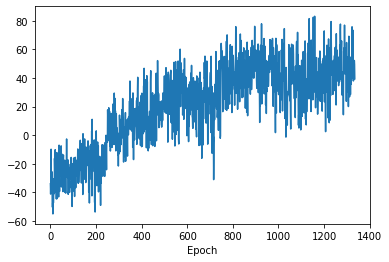

In [7]:
_ = df.AverageEpRet.plot()

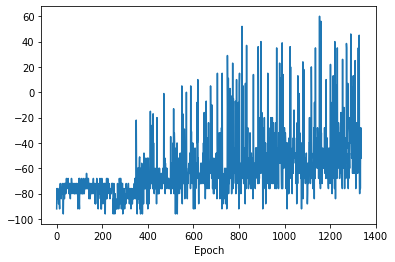

In [8]:
_ = df.MinEpRet.plot()

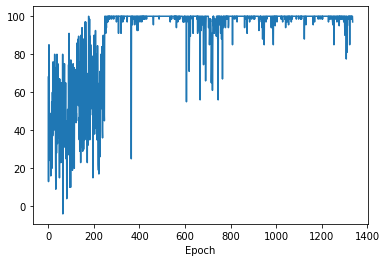

In [9]:
_ = df.MaxEpRet.plot()

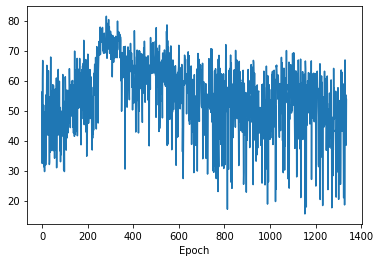

In [10]:
_ = df.StdEpRet.plot()

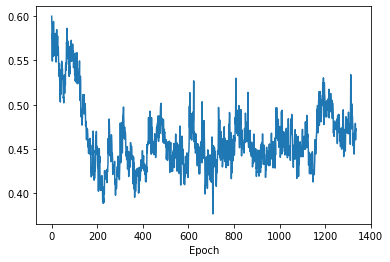

In [11]:
_ = df.Entropy.plot()

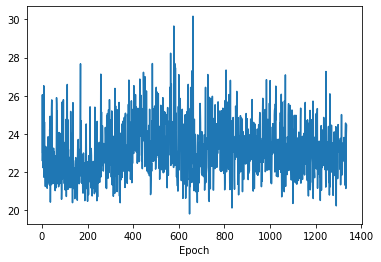

In [12]:
_ = df.Time.diff(1).plot()